In [1]:
import tensorflow as tf
import numpy as np

In [2]:
tf.__version__

'1.5.0'

In [3]:
sess = tf.InteractiveSession()

## TF Constant

In [4]:
sess.run(tf.constant(10) + tf.constant(20))

30

## TF Graph

In [5]:
new_graph = tf.Graph()

In [6]:
with new_graph.as_default():
    print(tf.get_default_graph())

## TF Variable

In [7]:
var = tf.Variable(tf.random_uniform((4, 4), minval=0, maxval=1))

In [8]:
# run this before attempting to run any var
init = tf.global_variables_initializer()

In [9]:
sess.run(init)

In [10]:
sess.run(var)

array([[0.08088946, 0.01825678, 0.14300537, 0.08841813],
       [0.47791898, 0.01997817, 0.20681834, 0.78522587],
       [0.4616593 , 0.12255836, 0.47152114, 0.9408027 ],
       [0.06783783, 0.7719847 , 0.75496745, 0.8850739 ]], dtype=float32)

In [11]:
ph = tf.placeholder(tf.float32)

## Model

In [12]:
np.random.seed(101)
tf.set_random_seed(101)

In [13]:
rand_a = np.random.uniform(low=0, high=100, size=(5, 5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [14]:
rand_b = np.random.uniform(low=0, high=100, size=(5, 1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [15]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [16]:
add_op = a + b
mul_op = a * b

In [17]:
sess.run(add_op, feed_dict={a: rand_a, b: rand_b})

array([[151.07166 , 156.49855 , 102.27921 , 116.58396 , 167.95949 ],
       [135.45622 ,  82.76316 , 141.42784 , 124.22093 ,  71.06043 ],
       [113.30171 ,  93.09215 ,  76.06819 , 136.43912 , 154.42728 ],
       [ 96.71727 ,  81.83804 , 133.83675 , 146.38118 , 101.10579 ],
       [122.72681 , 105.982925,  59.044632,  67.9831  ,  72.89292 ]],
      dtype=float32)

In [18]:
sess.run(mul_op, feed_dict={a: rand_a, b: rand_b})

array([[5134.644  , 5674.25   ,  283.12433, 1705.4707 , 6813.8315 ],
       [4341.8125 , 1598.267  , 4652.734  , 3756.8293 ,  988.94635],
       [3207.8113 , 2038.1029 , 1052.7742 , 4546.9805 , 5588.1157 ],
       [1707.379  ,  614.02527, 4434.989  , 5356.7773 , 2029.8555 ],
       [3714.0984 , 2806.6438 ,  262.76764,  747.19855, 1013.292  ]],
      dtype=float32)

## Neural network

In [19]:
n_features = 10
n_dense_neurons = 3

In [20]:
x = tf.placeholder(tf.float32, shape=(None, n_features))

In [21]:
W = tf.Variable(tf.random_normal((n_features, n_dense_neurons)))

b = tf.Variable(tf.ones(n_dense_neurons))

In [22]:
z = tf.add(tf.matmul(x, W), b)

In [23]:
a = tf.sigmoid(z)

In [24]:
init = tf.global_variables_initializer()

In [25]:
sess.run(init)

In [26]:
sess.run(a, feed_dict={x: np.random.random((1, n_features))})

array([[0.95683   , 0.81922567, 0.5244749 ]], dtype=float32)

## Simple regression

In [27]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [28]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
y_label

array([0.5420333 , 1.17575569, 0.85241231, 2.50514314, 4.67005971,
       4.41685654, 6.66701681, 6.69180648, 7.54731409, 9.03483077])

In [29]:
import matplotlib.pyplot as plt

%matplotlib inline

Text(0,0.5,'y_label')

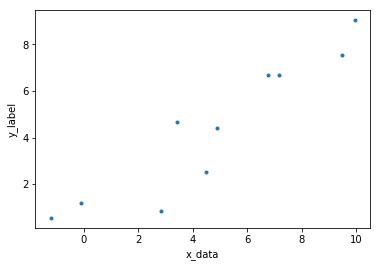

In [30]:
plt.plot(x_data, y_label, '.')
plt.xlabel("x_data")
plt.ylabel("y_label")

y = mx + b

In [31]:
m = tf.Variable(np.random.rand())
b = tf.Variable(np.random.rand())

In [32]:
# quadratic equation

error = 0

for x, y in zip(x_data, y_label):
    y_hat = m * x + b
    
    error += (y - y_hat) ** 2

error

<tf.Tensor 'add_21:0' shape=() dtype=float32>

In [33]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [34]:
init = tf.global_variables_initializer()

In [35]:
sess.run(init)

In [36]:
x_test = np.linspace(-1, 11, 10)

def train_nw(steps):    
    for i in range(steps):
        sess.run(train)

    optimized_m, optimized_b = sess.run([m, b])
    
    # y = mx + b
    y_pred_plot = optimized_m * x_test + optimized_b

    plt.plot(x_test, y_pred_plot, 'r')
    plt.plot(x_data, y_label, '.')

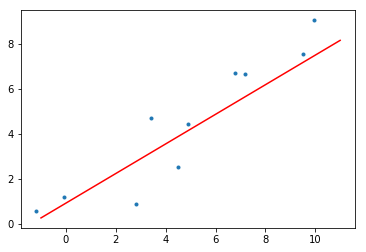

In [37]:
train_nw(1)

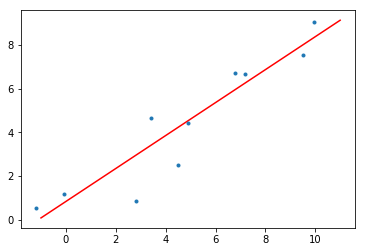

In [38]:
train_nw(100)